In [1]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


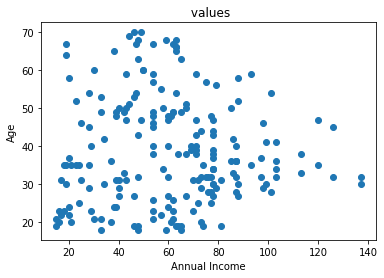

In [2]:
df=pd.read_csv("Mall_Customers.csv")
dfa=df[['Age','Annual Income (k$)']]
X = dfa[['Annual Income (k$)']]
Y = dfa[['Age']]

plt.scatter(X,Y)
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.title(' values')
plt.show()

In [3]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(dfa[['Age','Annual Income (k$)']])

In [4]:
dfa['cluster']=y_predict
dfa.head()

<ipython-input-4-6928f9abdecf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['cluster']=y_predict


,Age,Annual Income (k$),cluster
0,19,15,2
1,21,15,2
2,20,16,2
3,23,16,2
4,31,17,2


No handles with labels found to put in legend.


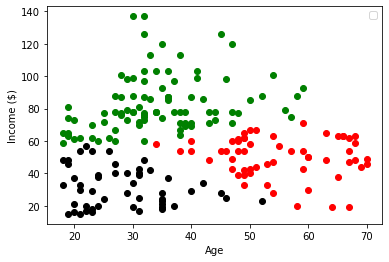

In [5]:
df1=dfa[dfa.cluster==0]
df2=dfa[dfa.cluster==1]
df3=dfa[dfa.cluster==2]

plt.scatter(df1.Age,df1['Annual Income (k$)'],color='green')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='red')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [6]:
scaler=MinMaxScaler()
scaler.fit(dfa[['Annual Income (k$)']])
dfa['Annual Income (k$)']=scaler.transform(dfa[['Annual Income (k$)']])
scaler.fit(dfa[['Age']])
dfa['Age']=scaler.transform(dfa[['Age']])

dfa

<ipython-input-6-4ffadc09011d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Annual Income (k$)']=scaler.transform(dfa[['Annual Income (k$)']])
<ipython-input-6-4ffadc09011d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Age']=scaler.transform(dfa[['Age']])


,Age,Annual Income (k$),cluster
0,0.019231,0.000000,2
1,0.057692,0.000000,2
2,0.038462,0.008197,2
3,0.096154,0.008197,2
4,0.250000,0.016393,2
...,...,...,...
195,0.326923,0.860656,0
196,0.519231,0.909836,0
197,0.269231,0.909836,0
198,0.269231,1.000000,0


In [7]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(dfa[['Age','Annual Income (k$)']])

In [8]:
dfa['cluster']=y_predict
dfa.head()

<ipython-input-8-6928f9abdecf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['cluster']=y_predict


,Age,Annual Income (k$),cluster
0,0.019231,0.000000,0
1,0.057692,0.000000,0
2,0.038462,0.008197,0
3,0.096154,0.008197,0
4,0.250000,0.016393,0


No handles with labels found to put in legend.


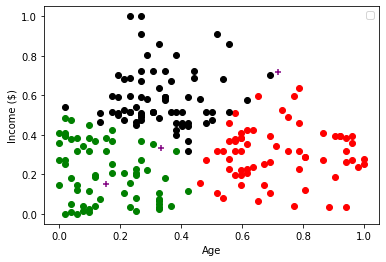

In [9]:
df1=dfa[dfa.cluster==0]
df2=dfa[dfa.cluster==1]
df3=dfa[dfa.cluster==2]

plt.scatter(df1.Age,df1['Annual Income (k$)'],color='green')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='red')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,0],color='purple',marker='+')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [10]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(dfa[['Age','Annual Income (k$)']])
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
sse

[23.583906150363603,
 13.028938428018277,
 7.492107868586008,
 6.055824667599621,
 4.738918324790585,
 3.8621709140875726,
 3.054717436369359,
 2.642520343536073,
 2.3301075323423226]

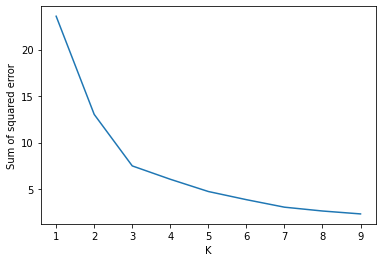

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)